In [2]:
import os.path

import matplotlib.pyplot as plt
import torch
import numpy as np

# Basic operations

In [3]:
# Creating tensors

np.set_printoptions(precision = 3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype = np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

t_ones = torch.ones(2, 3)

t_rand = torch.rand(2, 3)

print(t_a)
print(t_b)

print("\nt_ones")
print(t_ones.shape)
print(t_ones)

print("\nt_rand")
print(t_rand)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)

t_ones
torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])

t_rand
tensor([[0.7168, 0.9656, 0.3441],
        [0.9638, 0.4404, 0.0462]])


In [4]:
# Manipulationg data type and shape of a tensor

t_b_new = t_b.to(torch.int64)
print('Changing dtype:\n',t_b.dtype, '-->', t_b_new.dtype)

t = torch.rand(3, 4)
t_tr = torch.transpose(t, 0, 1)
print('\nTranspose:\n', t.shape, '-->', t_tr.shape)

t_zeros = torch.zeros(1, 3, 1, 2, 4)
t_sqz = torch.squeeze(t_zeros)
print('\nRemoving unnecessary dimensions:\n', t_zeros.shape, '-->', t_sqz.shape)

t_r1 = t.reshape(2,6)
t_r2 = t.reshape(4, 3)
print(f'\nReshape:\n\tOriginal dim:\t{t.shape}\n', t,
      f'\n\n\tNew dim:\t\t{t_r1.shape}\n', t_r1,
      f'\n\n\tNew dim:\t\t{t_r2.shape}\n', t_r2)

Changing dtype:
 torch.int32 --> torch.int64

Transpose:
 torch.Size([3, 4]) --> torch.Size([4, 3])

Removing unnecessary dimensions:
 torch.Size([1, 3, 1, 2, 4]) --> torch.Size([3, 2, 4])

Reshape:
	Original dim:	torch.Size([3, 4])
 tensor([[0.4095, 0.2484, 0.2123, 0.0450],
        [0.7494, 0.5870, 0.8180, 0.7603],
        [0.2724, 0.4925, 0.7629, 0.1649]]) 

	New dim:		torch.Size([2, 6])
 tensor([[0.4095, 0.2484, 0.2123, 0.0450, 0.7494, 0.5870],
        [0.8180, 0.7603, 0.2724, 0.4925, 0.7629, 0.1649]]) 

	New dim:		torch.Size([4, 3])
 tensor([[0.4095, 0.2484, 0.2123],
        [0.0450, 0.7494, 0.5870],
        [0.8180, 0.7603, 0.2724],
        [0.4925, 0.7629, 0.1649]])


In [5]:
# Mathematical operations

print("Multiplication -> t3 = torch.multiply(t1, t2)")
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean = 0, std = 1, size = (5, 2))

display(t1, t2)

t3 = torch.multiply(t1, t2)
t3

Multiplication -> t3 = torch.multiply(t1, t2)


tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])

tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

In [6]:
torch.manual_seed(1)
t4 = 2 * torch.rand(2, 3, 4) - 1
t4_mean_0 = torch.mean(t4, axis = 0)
t4_mean_1 = torch.mean(t4, axis = 1)
t4_mean_2 = torch.mean(t4, axis = 2)

print('Original tensor dim = [2, 3, 4]:\n',t4)
print('\nMean axis 0 (depth dim = 2) dim = [3, 4]:\n', t4_mean_0)
print('\nMean axis 1 (rows dim = 3) dim = [2, 4]:\n', t4_mean_1)
print('\nMean axis 2 (columns dim = 4) dim = [2, 3]:\n', t4_mean_2)

Original tensor dim = [2, 3, 4]:
 tensor([[[ 0.5153, -0.4414, -0.1939,  0.4694],
         [-0.9414,  0.5997, -0.2057,  0.5087],
         [ 0.1390, -0.1224,  0.2774,  0.0493]],

        [[ 0.3652, -0.3897, -0.0729, -0.0900],
         [ 0.1449, -0.0040,  0.8742,  0.3112],
         [-0.3724, -0.6040, -0.1676, -0.4313]]])

Mean axis 0 (depth dim = 2) dim = [3, 4]:
 tensor([[ 0.4402, -0.4155, -0.1334,  0.1897],
        [-0.3982,  0.2979,  0.3342,  0.4100],
        [-0.1167, -0.3632,  0.0549, -0.1910]])

Mean axis 1 (rows dim = 3) dim = [2, 4]:
 tensor([[-0.0957,  0.0120, -0.0407,  0.3425],
        [ 0.0459, -0.3326,  0.2112, -0.0701]])

Mean axis 2 (columns dim = 4) dim = [2, 3]:
 tensor([[ 0.0873, -0.0097,  0.0858],
        [-0.0469,  0.3316, -0.3938]])


In [7]:
# Matrix product

print('Dimension t1 and t2 = [5, 2]')
display(t1.T, t2)


t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print('Result of [5, 2] @ [5, 2].T = [5, 5]\n', t5)

t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print('\nResult of [5, 2].T @ [5, 2].T = [2, 2]\n', t6)

Dimension t1 and t2 = [5, 2]


tensor([[ 0.5153, -0.1939, -0.9414, -0.2057,  0.1390],
        [-0.4414,  0.4694,  0.5997,  0.5087, -0.1224]])

tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])

Result of [5, 2] @ [5, 2].T = [5, 5]
 tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])

Result of [5, 2].T @ [5, 2].T = [2, 2]
 tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [31]:
# Norm tensor

t1_norm1 = torch.linalg.norm(t1, ord = 1, dim = 1)
t1_norm2_0 = torch.linalg.norm(t1, ord = 2, dim = 0)
t1_norm2_1 = torch.linalg.norm(t1, ord = 2, dim = 1)

print('t1 dimension: [5, 2]:\n', t1)
print('\nt1 norm 1: [1, 5]:\n', t1_norm1)
print('\nt1 norm 2 w/ dim = 0 (columns):\n', t1_norm2_0) # by th rank of elem (columns)
print('\nt1 norm 2 w/ dim = 1 (vectors):\n', t1_norm2_1) # each vector norm (rows)

t1 dimension: [5, 2]:
 tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])

t1 norm 1: [1, 5]:
 tensor([0.9566, 0.6632, 1.5412, 0.7145, 0.2615])

t1 norm 2 w/ dim = 0 (columns):
 tensor([1.1185, 1.0240])

t1 norm 2 w/ dim = 1 (vectors):
 tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [51]:
# Split

torch.manual_seed(1)
t = torch.rand(7)
print('Original tensor:', t)


t_split = torch.chunk(t, 4)
print('\nSplited into numpy arrays providing # of chunks [4]:\n')
display([item.numpy() for item in t_split])

t_split_sizes = torch.split(t, split_size_or_sections = [1, 2, 4])
print('\nSplited into numpy arrays providing size of splits [1, 2, 4]:\n')
display([item.numpy() for item in t_split_sizes])

Original tensor: tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999, 0.3971])

Splited into numpy arrays providing # of chunks [4]:


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32),
 array([0.397], dtype=float32)]


Splited into numpy arrays providing size of splits [1, 2, 4]:


[array([0.758], dtype=float32),
 array([0.279, 0.403], dtype=float32),
 array([0.735, 0.029, 0.8  , 0.397], dtype=float32)]

In [66]:
# Concatenate

t_a = torch.ones(3, 2)
t_b = torch.zeros(3, 2)

t_c_0 = torch.cat([t_a, t_b], axis = 0)
t_c_1 = torch.cat([t_a, t_b], axis = -1)

t_c_stack = torch.stack([t_a,t_b], axis = 1)

print('Concatenete axis = 0:\n')
display(t_c_0)

print('\nConcatenete axis = 1:\n')
display(t_c_1)

print('\nStack axis = 1:\n')
display(t_c_stack)

Concatenete axis = 0:


tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


Concatenete axis = 1:


tensor([[1., 1., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 0., 0.]])


Stack axis = 1:


tensor([[[1., 1.],
         [0., 0.]],

        [[1., 1.],
         [0., 0.]],

        [[1., 1.],
         [0., 0.]]])

# Building input pipelines

## Pytorch DataLoader (from existing tensors)

### Basic operations

Using the torch.utils.data.DataLoader() class works with Python list, tensor object or NumPy arrays.

In [74]:
from torch.utils.data import DataLoader

t = torch.arange(7, dtype = torch.float32)
print(f'Original tensor dim = [{t.shape}]:\n')
display(t)

print('Iterate trhough the dataset:')
data_loader = DataLoader(t)
for item in data_loader:
      print(item)
      
print('\nCreating batches with size = 3:')
data_loader_batch = DataLoader(t, batch_size = 3, drop_last = False)
for i, batch in enumerate(data_loader_batch, start = 1):
      print(f'Batch[{i}]:\t', batch)
      
print('\nCreating batches with size = 3 + drop_last:')
data_loader_batch_drop = DataLoader(t, batch_size = 3, drop_last = True)
for i, batch in enumerate(data_loader_batch_drop, start = 1):
      print(f'Batch[{i}]:\t', batch)

Original tensor dim = [torch.Size([7])]:


tensor([0., 1., 2., 3., 4., 5., 6.])

Iterate trhough the dataset:
tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])
tensor([6.])

Creating batches with size = 3:
Batch[1]:	 tensor([0., 1., 2.])
Batch[2]:	 tensor([3., 4., 5.])
Batch[3]:	 tensor([6.])

Creating batches with size = 3 + drop_last:
Batch[1]:	 tensor([0., 1., 2.])
Batch[2]:	 tensor([3., 4., 5.])


In [102]:
# Case w/ one tensor for features and another for labels
from torch.utils.data import Dataset, TensorDataset

torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype = torch.float32)
t_y = torch.arange(4)

class JointDataset(Dataset):
    def __init__(self, X, y):
      self.X = X
      self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
      
joint_dataset = JointDataset(t_x, t_y)
print("Using class JointDataset:")
for example in joint_dataset:
    print('\tx:\t', example[0], '\t||\ty:\t', example[1])
      
joint_dataset = TensorDataset(t_x, t_y)
print("\n\nUsing simply TensorDataset:")
for example in joint_dataset:
    print('\tx:\t', example[0], '\t||\ty:\t', example[1])   

Using class JointDataset:
	x:	 tensor([0.7576, 0.2793, 0.4031]) 	||	y:	 tensor(0)
	x:	 tensor([0.7347, 0.0293, 0.7999]) 	||	y:	 tensor(1)
	x:	 tensor([0.3971, 0.7544, 0.5695]) 	||	y:	 tensor(2)
	x:	 tensor([0.4388, 0.6387, 0.5247]) 	||	y:	 tensor(3)


Using simply TensorDataset:
	x:	 tensor([0.7576, 0.2793, 0.4031]) 	||	y:	 tensor(0)
	x:	 tensor([0.7347, 0.0293, 0.7999]) 	||	y:	 tensor(1)
	x:	 tensor([0.3971, 0.7544, 0.5695]) 	||	y:	 tensor(2)
	x:	 tensor([0.4388, 0.6387, 0.5247]) 	||	y:	 tensor(3)


In [107]:
# Shuffle, batch and repeat (Appliable with SGD)

print('Original dataset:')
display([example for example in joint_dataset])

torch.manual_seed(1)
data_loader_SGD = DataLoader(dataset = joint_dataset,
                             batch_size = 2,
                             shuffle = True)

for i, batch in enumerate(data_loader_SGD, start = 1):
    print(f'Batch {i}:\tx:\n', batch[0], '\n\t\t\ty:\n', batch[1], '\n')

Original dataset:


[(tensor([0.7576, 0.2793, 0.4031]), tensor(0)),
 (tensor([0.7347, 0.0293, 0.7999]), tensor(1)),
 (tensor([0.3971, 0.7544, 0.5695]), tensor(2)),
 (tensor([0.4388, 0.6387, 0.5247]), tensor(3))]

Batch 1:	x:
 tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
			y:
 tensor([2, 0]) 

Batch 2:	x:
 tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
			y:
 tensor([1, 3]) 


In [112]:
# Adding epochs

for epoch in range(2):
    print(15 * '**/')
    print(f'Epoch {epoch + 1}')
    for i, batch in enumerate(data_loader_SGD, start = 1):
        print(f'Batch {i}:\tx:\n', batch[0], '\n\t\t\ty:\n', batch[1], '\n')

**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/
Epoch 1
Batch 1:	x:
 tensor([[0.7347, 0.0293, 0.7999],
        [0.7576, 0.2793, 0.4031]]) 
			y:
 tensor([1, 0]) 

Batch 2:	x:
 tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
			y:
 tensor([3, 2]) 

**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/
Epoch 2
Batch 1:	x:
 tensor([[0.4388, 0.6387, 0.5247],
        [0.7576, 0.2793, 0.4031]]) 
			y:
 tensor([3, 0]) 

Batch 2:	x:
 tensor([[0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695]]) 
			y:
 tensor([1, 2]) 


### Creating dataset from files locally stored

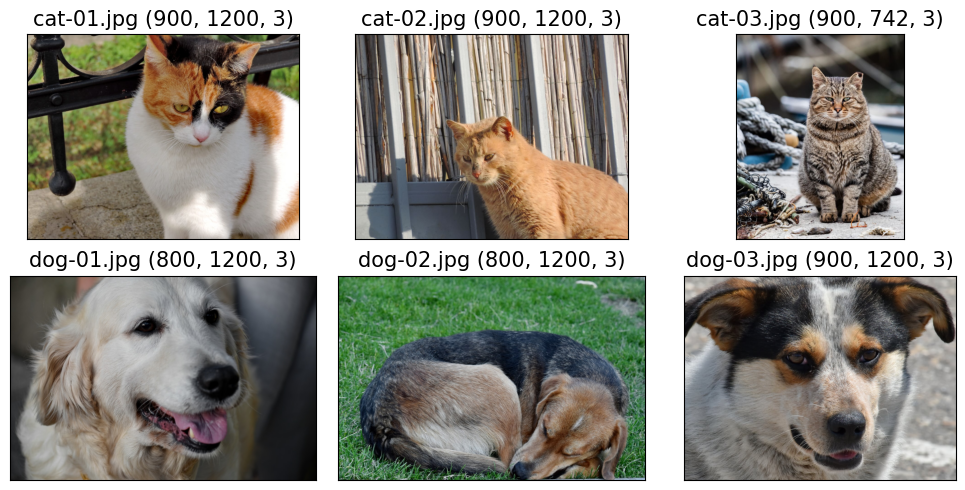

In [127]:
import pathlib
import os
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

imgdir_path = pathlib.Path('data/cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]

fig = plt.figure(figsize = (10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    # print('Image shape:', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(str(os.path.basename(file)) + ' ' + str(np.array(img).shape), size = 15)

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


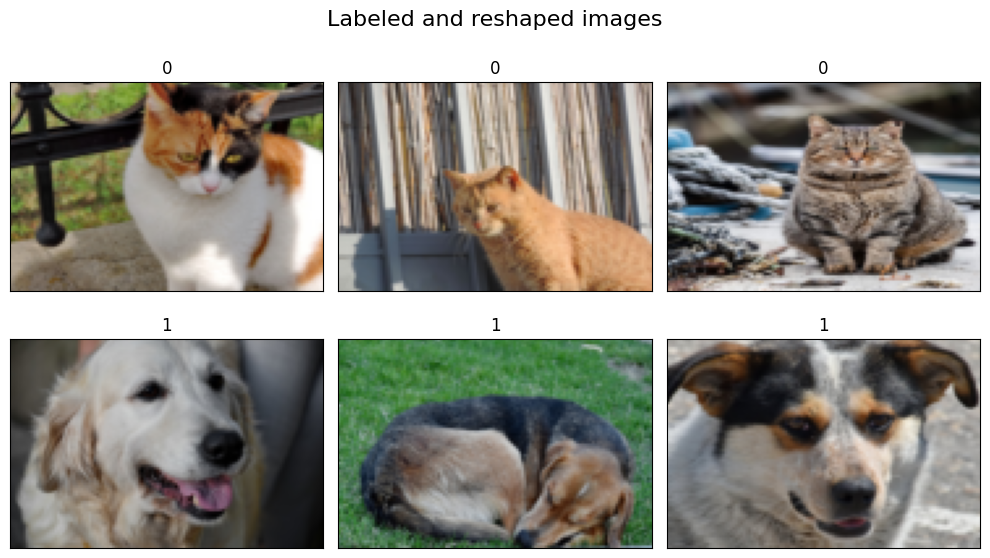

In [132]:
# Deal with sizes of images and create Dataset

img_heigth, img_width = 80, 120
transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Resize((img_heigth, img_width))
      ])



class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform = None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        
        return img, label
    
    def length(self):
        return len(self.labels)
      
image_dataset = ImageDataset(file_list, labels, transform)

fig = plt.figure(figsize = (10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size = 12)

fig.suptitle('Labeled and reshaped images', fontsize=16)
plt.tight_layout()
plt.show()

## Building Models with PyTorch

### Linear regression

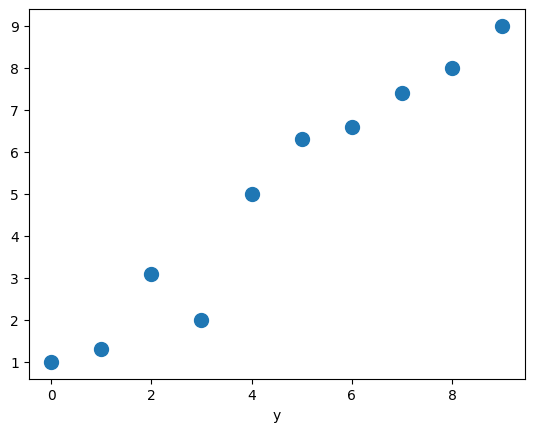

In [134]:
X_train = np.arange(10, dtype = 'float32').reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0,
                  6.3, 6.6, 7.4, 8.0, 9.0],
                 dtype = 'float32')

plt.plot(X_train, y_train, 'o', markersize = 10)
plt.xlabel('x')
plt.xlabel('y')
plt.show()

In [136]:
# Standardize data, PyTorch Dataset and corresponding DataLoader w/ batch_size = 1

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
Xt_train_norm = torch.from_numpy(X_train_norm)
yt_train = torch.from_numpy(y_train).float()

batch_size = 1
train_ds = TensorDataset(Xt_train_norm, yt_train)
train_dl = DataLoader(train_ds, batch_size, shuffle = True)

Epoch 0	Loss 39.8977
Epoch 20	Loss 1.0158
Epoch 40	Loss 12.4277
Epoch 60	Loss 0.7894
Epoch 80	Loss 2.3939
Epoch 100	Loss 1.1216
Epoch 120	Loss 0.1076
Epoch 140	Loss 0.2256
Epoch 160	Loss 0.0495
Epoch 180	Loss 0.0017

**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/
Final Parameters: 2.644019603729248 4.712854862213135


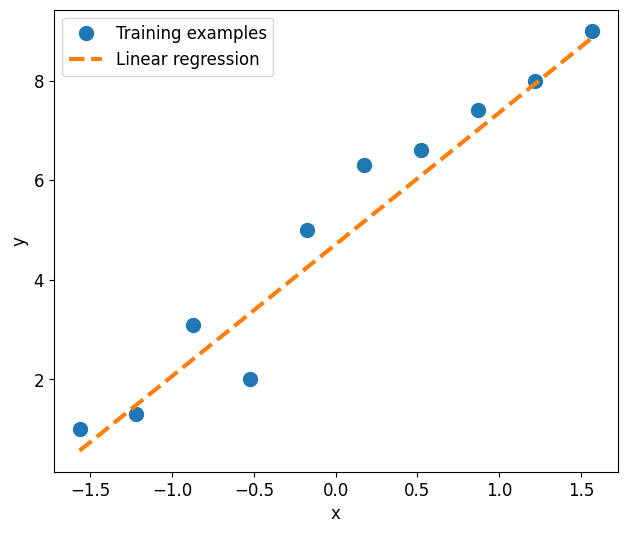

In [174]:
# Linear regression from scratch

def train_linreg(data_loader,
    learning_rate = 0.001,
    num_epochs = 200):
      
    log_epochs = 20
    torch.manual_seed(1)

    weight = torch.randn(1)
    
    # Autograd should record operations on this tensor:
    weight.requires_grad_(True) 
    bias = torch.zeros(1, requires_grad = True)
    
    def linear_model(xb):
        return xb @ weight + bias
    
    def loss_fn(input, target):
        return (input - target).pow(2).mean() # MSE
    
    for epoch in range(num_epochs):
        for x_batch, y_batch in data_loader:
            pred = linear_model(x_batch)
            loss = loss_fn(pred, y_batch.long())
            loss.backward()
        
            with torch.no_grad(): # Context-manager that disables gradient calculation
                weight -= weight.grad * learning_rate
                bias -= bias.grad * learning_rate
                
                weight.grad.zero_()
                bias.grad.zero_()
            
        if epoch % log_epochs == 0:
            print(f'Epoch {epoch}\tLoss {loss.item():.4f}')

    print('\n' + 15 * '**/' + '\nFinal Parameters:', weight.item(), bias.item())
    
    X_test = np.linspace(0, 9, num = 100, dtype = 'float32').reshape(-1, 1)
    X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
    Xt_test_norm = torch.from_numpy(X_test_norm)
    y_pred = linear_model(Xt_test_norm).detach().numpy()
    
    fig = plt.figure(figsize = (16,6))
    ax = fig.add_subplot(1, 2, 1)
    
    plt.plot(Xt_train_norm, y_train, 'o', markersize = 10)
    plt.plot(Xt_test_norm, y_pred, '--', lw = 3)
    plt.legend(['Training examples', 'Linear regression'], fontsize = 12)
    ax.set_xlabel('x', size = 12)
    ax.set_ylabel('y', size = 12)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
    plt.show()

train_linreg(train_dl)    

In [177]:
# Using PyTorch's implementation torch.nn.Linear w/SGD

import torch.nn as nn

loss_fn = nn.MSELoss(reduction = 'mean')
input_size = 1
output_size = 1

model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

for epoch in range (200):
    for x_batch, y_batch in train_dl:
        # Generate predictions:
        pred = model(x_batch)[:, 0]
        
        # Compute Loss
        loss = loss_fn(pred, y_batch)
        
        # Compute gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        # Reset gradients to zero
        optimizer.zero_grad()
    
    if epoch % 20 == 0:
        print(f'Epoch {epoch}\tLoss {loss.item():.4f}')

print('\n' + 15 * '**/' + '\nFinal Parameters:', model.weight.item(), model.bias.item())
        

Epoch 0	Loss 8.0616
Epoch 20	Loss 27.4636
Epoch 40	Loss 12.7243
Epoch 60	Loss 2.4434
Epoch 80	Loss 1.4594
Epoch 100	Loss 1.4558
Epoch 120	Loss 1.9793
Epoch 140	Loss 0.6697
Epoch 160	Loss 0.2457
Epoch 180	Loss 0.0892

**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/
Final Parameters: 2.663029432296753 4.865717887878418


### Multilayer perceptron